In [4]:
#####线性回归
from predict_v2 import predict
import pylab as plt
import pandas as pd
import joblib
import matplotlib.dates as mdates
from models.linear_regression import linearregression_train

from trading_strategy.machinelearning_trading import buy_and_sell_in_one_day
from trading_strategy.machinelearning_trading import buy_and_sell_in_5_days
from trading_strategy.machinelearning_trading import buy_and_select_when_sell






yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


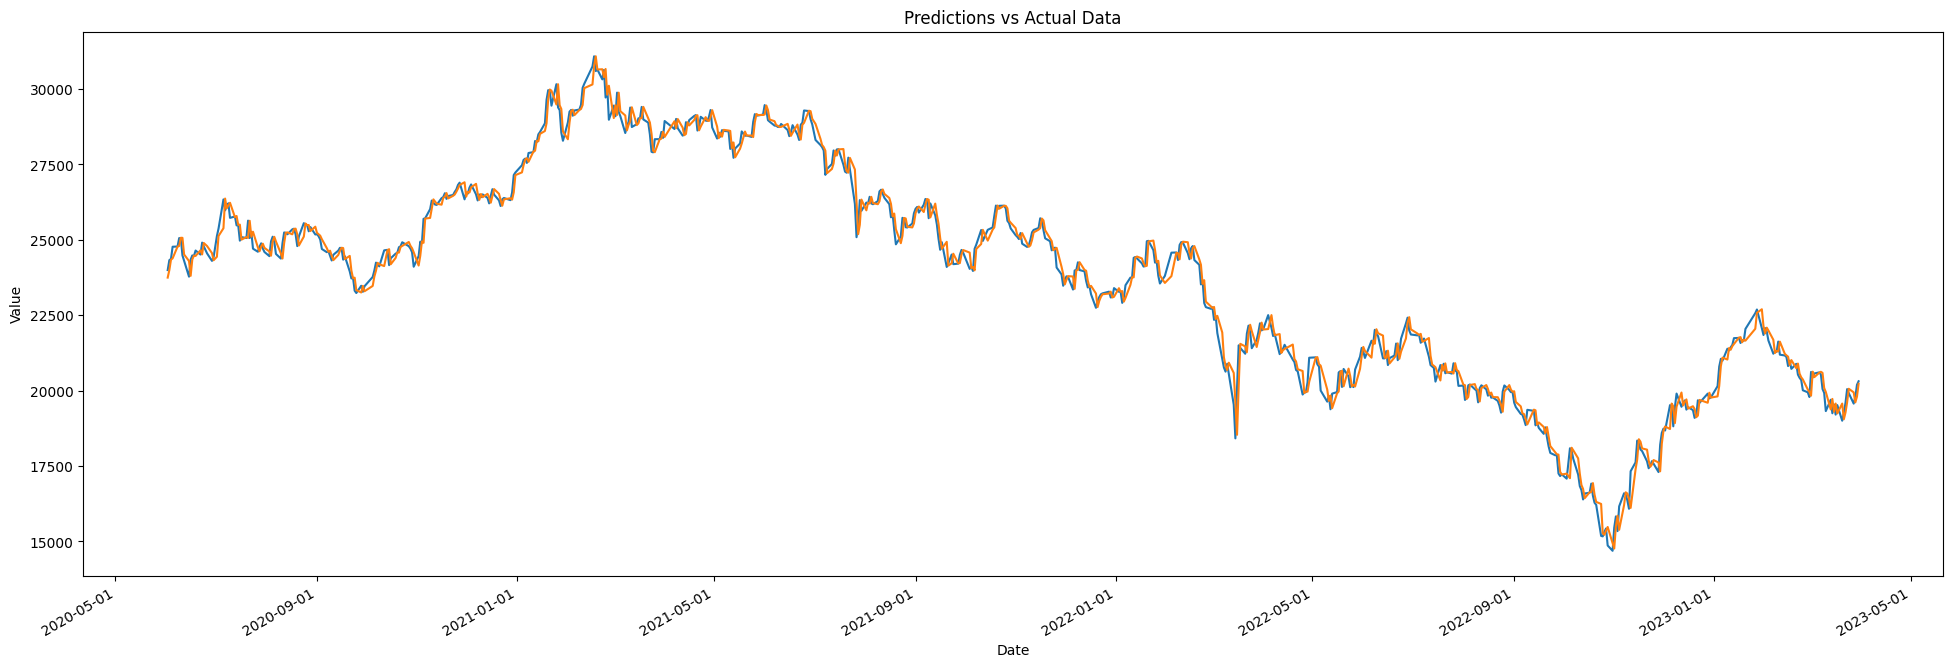

Mean Squared Error at prediction: 122346.55948754604


In [5]:
####训练

linearregression_train(datapath = 'stock_data/^HSI.csv',startdate = "2010-01-01",enddate = "2020-06-30")
###预测

mse,actual,pred,whole_predict = predict('linearregression',datapath = 'stock_data/^HSI.csv',startdate = "2020-06-01",enddate = "2023-3-30")
# buy_and_sell_in_one_day(whole_predict,'linear_regre_HSI.txt')
buy_and_select_when_sell(whole_predict,'log/linear_regre_HSI.txt')
plt.figure(figsize = (24,8))
plt.plot(actual['Date'],actual['Close'], label ='actual')
plt.plot(pred['Date'],pred['Close'],label = 'pred' )
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xlabel('Date')
plt.ylabel('Value')
plt.gcf().autofmt_xdate()
plt.title('Predictions vs Actual Data')
plt.show()
print("Mean Squared Error at prediction:", mse)

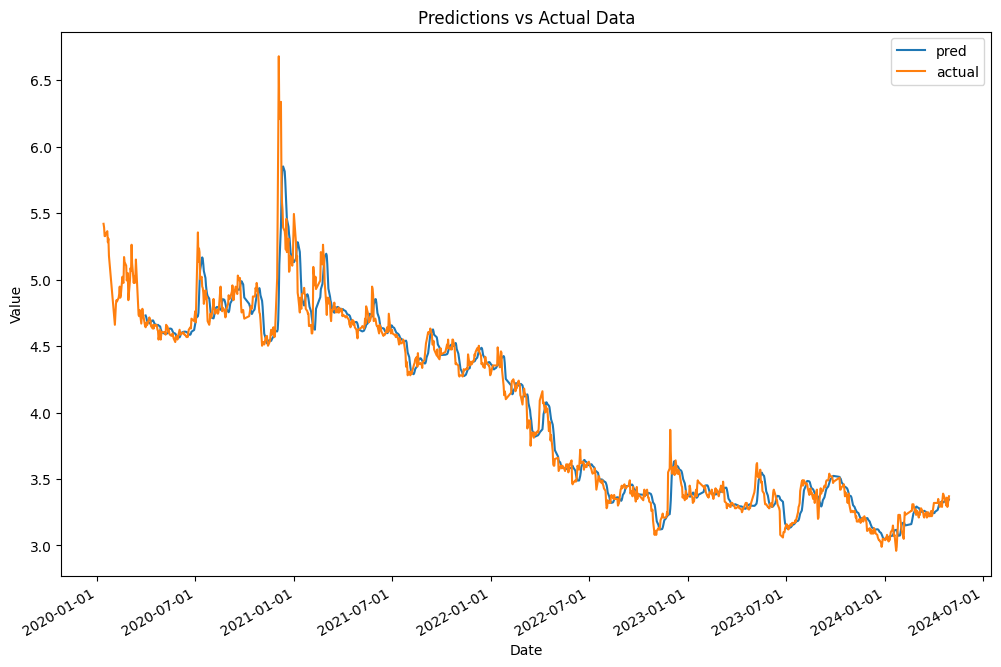

MSE ON TRAIN:0.004568384
MSE ON TEST:0.00085652724


In [6]:
# lstm_train('stock_data/0066.HK.csv',"2010-01-01","2020-06-30",num_epochs=200)

#####利用训练好的lstm模型预测
mse_train,mse_test,testPredictPlot,trainPredictPlot,data,whole_predict= predict('lstm',datapath = 'stock_data/002948.SZ.csv',startdate = "2020-01-11",enddate = "2024-4-29")
###交易回测
# buy_and_sell_in_one_day(whole_predict,'lstm_log_HSI_1.txt')
buy_and_select_when_sell(whole_predict,'log/lstm_log_BQD._2.txt') 
# buy_and_sell_in_5_days(whole_predict,'log/lstm_log_B5D.txt') 

plt.figure(figsize=(12,8))

# plt.plot(pd.to_datetime(data['Date']),data['Close'],label = 'data')
# plt.plot(pd.to_datetime(testPredictPlot['Date']),testPredictPlot['Close'],label = 'test_pred')
# plt.plot(pd.to_datetime(trainPredictPlot['Date']),trainPredictPlot['Close'],label = 'train_pred')
plt.plot(pd.to_datetime(whole_predict['Date']),whole_predict['pred_close'],label = 'pred')
plt.plot(pd.to_datetime(whole_predict['Date']),whole_predict['act_close'],label = 'actual')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.xlabel('Date')
plt.ylabel('Value')
 
 
plt.gcf().autofmt_xdate()
plt.title('Predictions vs Actual Data')
plt.legend()
plt.show()


print('MSE ON TRAIN:'+str(mse_train))
print('MSE ON TEST:'+str(mse_test))

In [6]:
######训练lstm
from predict_v2 import predict
from lstm_train import lstm_train
import pylab as plt
import pandas as pd
import joblib
import matplotlib.dates as mdates
from trading_strategy.machinelearning_trading import buy_and_sell_in_one_day
from trading_strategy.machinelearning_trading import buy_and_select_when_sell
from trading_strategy.machinelearning_trading import buy_and_sell_in_5_days



In [7]:
mse_train, mse_test, y_train, train_pred, y_test, test_pred, mtr = predict('randomforest')

plt.figure(figsize=(12, 6))
plt.plot(y_train, label='Actual Train')
plt.plot(train_pred, label='Predicted Train')
plt.legend()
plt.title('Random Forest Predictions on Train Data')
plt.show()

# 绘制测试集的预测结果

####显示好像有问题？？？
# plt.figure(figsize=(12, 6))
# plt.plot(y_test, label='Actual Test')
# plt.plot(test_pred, label='Predicted Test')
# plt.legend()
# plt.title('Random Forest Predictions on Test Data')
# plt.show()


[*********************100%%**********************]  1 of 1 completed

1 Failed download:
['0066.HK']: SSLError(MaxRetryError("HTTPSConnectionPool(host='fc.yahoo.com', port=443): Max retries exceeded with url: / (Caused by SSLError(SSLEOFError(8, 'EOF occurred in violation of protocol (_ssl.c:1129)')))"))


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (600,) + inhomogeneous part.